In [ ]:
!pip install -Uqqq pip
!pip install -qqq torch==2.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 105.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch

torch.__version__

'2.2.1+cu121'

## Runtime > Change runtime type > GPU

In [ ]:
!nvidia-smi

Thu Jul 18 07:41:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
torch.cuda.is_available()

True

## Tensors

In [ ]:
#data needs to be converted into tensors to use them with pytorch
scalar = torch.tensor(42) #creates tensor with int value 42
scalar

tensor(42)

In [ ]:
scalar.item() #returns value of tensor

42

In [ ]:
#tensors cannot be strings
#e.g. torch.tensor("Hello") returns error

In [ ]:
scalar.dtype #data type of tensor

torch.int64

In [ ]:
float_scalar = scalar.to(torch.float32) #convert tensor from int64 to float32
float_scalar.item(), float_scalar, float_scalar.dtype

(42.0, tensor(42.), torch.float32)

In [ ]:
vector = torch.tensor([1, 42]) #create tensor as a vector
vector, vector.shape, vector.dtype

(tensor([ 1, 42]), torch.Size([2]), torch.int64)

In [ ]:
matrix = torch.tensor([[1, 42], [42, 1]]) #create tensor as a matrix
matrix, matrix.shape

(tensor([[ 1, 42],
         [42,  1]]),
 torch.Size([2, 2]))

## Operations

In [ ]:
torch.zeros((2, 2)) #creates a 2x2 zero matrix

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
random_tensor = torch.rand(size=(2, 3)) #2x3 matrix with random values
random_tensor

tensor([[0.7479, 0.8532, 0.1621],
        [0.6538, 0.9265, 0.2311]])

In [ ]:
t = torch.tensor([[1,2,3],[4,5,6]]) #2x3 matrix
t.reshape(3,2) #converts to 3x2 matrix

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [ ]:
t = torch.tensor([[1, 42],[42, 1]])
print(t.shape)
torch.unsqueeze(t, dim=0).shape #adds another dimension

torch.Size([2, 2])


torch.Size([1, 2, 2])

In [ ]:
t = torch.tensor([[.3, .5, .2],[.1,.05,.85]])
t.max() #max entry

tensor(0.8500)

In [ ]:
t.max(dim=1) #max entry of each vector

torch.return_types.max(
values=tensor([0.5000, 0.8500]),
indices=tensor([1, 2]))

## Creating Tensors from external data

In [ ]:
import numpy as np

a = np.array([1, 42]) #array to act as external data
t = torch.from_numpy(a) #creates tensor from array named a
t

tensor([ 1, 42])

In [ ]:
import pandas as pd

df = pd.DataFrame({"numbers": [1, 42]}) #dataframe to act as external data
df

,numbers
0,1
1,42


In [ ]:
t = torch.from_numpy(df.numbers.to_numpy()) #creates tensor from dataframe
t

tensor([ 1, 42])

## Running on GPU

In [ ]:
torch.cuda.is_available()

In [ ]:
!nvidia-smi --query-gpu=memory.used --format=csv #check gpu mem used

memory.used [MiB]
3 MiB


In [ ]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu") #creates pointer pointing to gpu, if cuda is available
device

device(type='cuda')

In [ ]:
t = torch.tensor(1)
t.device #torch defaults to using cpu

device(type='cpu')

In [ ]:
gpu_tensor = torch.tensor(1, device=device) #creates tensor with gpu if available
gpu_tensor

tensor(1, device='cuda:0')

In [ ]:
cpu_tensor = torch.tensor(1) #creates tensor with cpu
cpu_tensor.to(device) #convertes tensor to use gpu, not permanent

tensor(1, device='cuda:0')

In [ ]:
cpu_tensor.to(device) + gpu_tensor #tensors must be using same device

tensor(2, device='cuda:0')

## Implementaion

In [ ]:
!pip install tqdm

from ast import increment_lineno
import copy
import random
import re
from collections import OrderedDict
from typing import List, Optional, Tuple

import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from pylab import rcParams
from sklearn.model_selection import train_test_split
from torch import nn
from torch.utils.data import Dataset
from torch.optim import Adam
from torch.utils.data import DataLoader, dataset
from tqdm import tqdm_gui
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.figure_format='retina'

SEED = 42

def seed_everything(seed: int): #function to generate random
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)


seed_everything(SEED)

## Data Wrangling

In [ ]:
! pip install kaggle
!gdown 1yzQUyNBL1J7v-WYzoBVu3ordGQfDzTVY #download kaggle.json
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download animeshmahajan/FitBit-Dataset
!unzip FitBit-Dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1yzQUyNBL1J7v-WYzoBVu3ordGQfDzTVY
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 288kB/s]
mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/animeshmahajan/FitBit-Dataset
License(s): DbCL-1.0
100% 4.09M/4.09M [00:00<00:00, 34.2MB/s]
100% 4.09M/4.09M [00:00<00:00, 34.1MB/s]


In [ ]:
df = pd.read_csv("/content/FitBit Dataset/dailyActivity_merged.csv")
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [ ]:
pattern = re.compile(r"(?<!^)(?=[A-Z])")
column_names = [pattern.sub("_", name).lower() for name in df.columns]
df.columns = column_names
df.head()

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [ ]:
#Obtain unique user ids
user_ids = df.id.unique()
user_ids

array([1503960366, 1624580081, 1644430081, 1844505072, 1927972279,
       2022484408, 2026352035, 2320127002, 2347167796, 2873212765,
       3372868164, 3977333714, 4020332650, 4057192912, 4319703577,
       4388161847, 4445114986, 4558609924, 4702921684, 5553957443,
       5577150313, 6117666160, 6290855005, 6775888955, 6962181067,
       7007744171, 7086361926, 8053475328, 8253242879, 8378563200,
       8583815059, 8792009665, 8877689391])

In [ ]:
train_ids, temp_ids = train_test_split(user_ids, test_size=.2) #split users into train and test data, 80% of users used for training, 20% used for testing
test_ids, val_ids = train_test_split(temp_ids, test_size=.5) #half of test users are validation

In [ ]:
train_df = df[df.id.isin(train_ids)] #create train and test dfs based on which users are assigned to test/train
test_df = df[(df.id.isin(train_ids))]
val_df = df[df.id.isin(val_ids)] #create validation df

train_df.shape, test_df.shape, val_df.shape

((735, 15), (735, 15), (114, 15))

In [ ]:
#Function to create calories dataset
class CaloriesDataset(Dataset):
  def __init__(self, data: pd.DataFrame):
      self.features = data[["total_distance", "very_active_minutes"]]  #set total distance and very active minutes as features (independent variables)
      self.labels = data["calories"] #set calories as label (dependent variable)

  def __getitem__(self, index): #create tensors
    features = torch.FloatTensor(self.features.iloc[index].to_numpy()) #create floating point tensor as numpy array
    label = self.labels.iloc[index]
    return features, label

  def __len__(self): #return length of labels
    return len(self.labels)

In [ ]:
#Create train, test and val datasets to use total dist and very active mins to predict calories
train_dataset = CaloriesDataset(train_df)
val_dataset = CaloriesDataset(val_df)
test_dataset = CaloriesDataset(test_df)

train_dataset[0], val_dataset[0], test_dataset[0]

((tensor([ 8.5000, 25.0000]), 1985),
 (tensor([5.9100, 2.0000]), 1982),
 (tensor([ 8.5000, 25.0000]), 1985))

In [ ]:
#Wrap datasets into data loaders
train_loader = DataLoader(
    dataset=train_dataset, batch_size=8, shuffle=True, num_workers=1, drop_last=True
    )

val_loader = DataLoader(
    val_dataset, batch_size=8, shuffle=False, num_workers=1, drop_last=True
    )

test_loader = DataLoader(
    test_dataset, batch_size=8, shuffle=False, num_workers=1, drop_last=True
    )


In [ ]:
for batch_idx, (features, labels) in enumerate(train_loader):
  print(features)
  print(labels)
  #features and labels are tensors
  break

tensor([[ 12.2200,  15.0000],
        [  7.8000,   4.0000],
        [  0.2500,   0.0000],
        [  4.8100,  63.0000],
        [  0.0000,   0.0000],
        [ 28.0300, 186.0000],
        [  3.2200,   0.0000],
        [  1.7700,   0.0000]])
tensor([3538, 1584, 2151, 3491,  665, 2690, 1693, 2430])


## Creating Model

In [ ]:
model = nn.Sequential(
    OrderedDict(
        [
            ("hidden_layer_1", nn.Linear(2, 64)),
            ("activation_1", nn.ReLU()),
            ("hidden_layer_2", nn.Linear(64, 32)),
            ("activation_2", nn.ReLU()),
            ("output_layer", nn.Linear(32, 1))
        ]
    )
)
model

Sequential(
  (hidden_layer_1): Linear(in_features=2, out_features=64, bias=True)
  (activation_1): ReLU()
  (hidden_layer_2): Linear(in_features=64, out_features=32, bias=True)
  (activation_2): ReLU()
  (output_layer): Linear(in_features=32, out_features=1, bias=True)
)

In [ ]:
model.hidden_layer_1.weight[:10]

tensor([[ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998],
        [ 0.5451,  0.1045],
        [-0.3301,  0.1802],
        [-0.3258, -0.0829],
        [-0.2872,  0.4691],
        [-0.5582, -0.3260],
        [-0.1997, -0.4252]], grad_fn=<SliceBackward0>)

In [ ]:
layers = []

for name, child in model.named_children():
  if "activation" in name:
    continue
layers.append(
      {
          "layer": name,
          "weight_parameters": child.weight.numel(),
          "bias_parameters": child.bias.numel()
      }
  )


pd.DataFrame(layers)


,layer,weight_parameters,bias_parameters
0,output_layer,32,1


In [ ]:
for batch_idx, (features, labels) in enumerate(train_loader):
  #print(features.shape)
  predictions = model(features)
  break



In [ ]:
labels

tensor([3165, 1141, 3832, 2696, 1444, 2169, 2194, 1931])

In [ ]:
predictions

tensor([[-0.7189],
        [-0.0321],
        [-1.8781],
        [-0.1306],
        [ 0.0041],
        [-0.7675],
        [ 0.0072],
        [-0.2868]], grad_fn=<AddmmBackward0>)

## Training

In [ ]:
loss_fn = nn.HuberLoss(delta=0.6)
optimizer = Adam(model.parameters(), lr=0.001)
model = model.to(device)

In [ ]:
def train_one_epoch(model, train_loader, loss_fn, optimizer, device):
  model.train()
  train_loss_accum = 0.0
  for features, labels in train_loader:
    features = features.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    logits = model(features)
    logits = torch.squeeze(logits)
    labels = labels.float()
    loss = loss_fn(logits, labels)
    loss.backward()
    optimizer.step()
    train_loss_accum += loss.item() * features.size(0)
  return train_loss_accum / len(train_loader.dataset)

In [ ]:
def validate(model, val_loader, loss_fn, device):
  model.eval()
  val_loss_accum = 0.0
  with torch.inference_mode():
    for features, labels in val_loader:
      features = features.to(device)
      labels = labels.to(device)
      logits = model(features)
      logits = torch.squeeze(logits)
      labels = labels.float()
      loss = loss_fn(logits, labels)
      val_loss_accum += loss.item() * features.size(0)
    return val_loss_accum / len(val_loader.dataset)

In [ ]:
N_EPOCH = 100
best_val_loss = float("inf")
train_losses = []
val_losses = []

for epoch in tqdm(range(N_EPOCH)):
  train_loss = train_one_epoch(model, train_loader, loss_fn, optimizer, device)
  val_loss = validate(model, val_loader, loss_fn, device)

  if val_loss < best_val_loss:
    best_val_loss = val_loss
    best_model_state = copy.deepcopy(model.state_dict())

  train_losses.append(train_loss)
  val_losses.append(val_loss)

100%|██████████| 100/100 [00:56<00:00,  1.76it/s]


## Evaluation

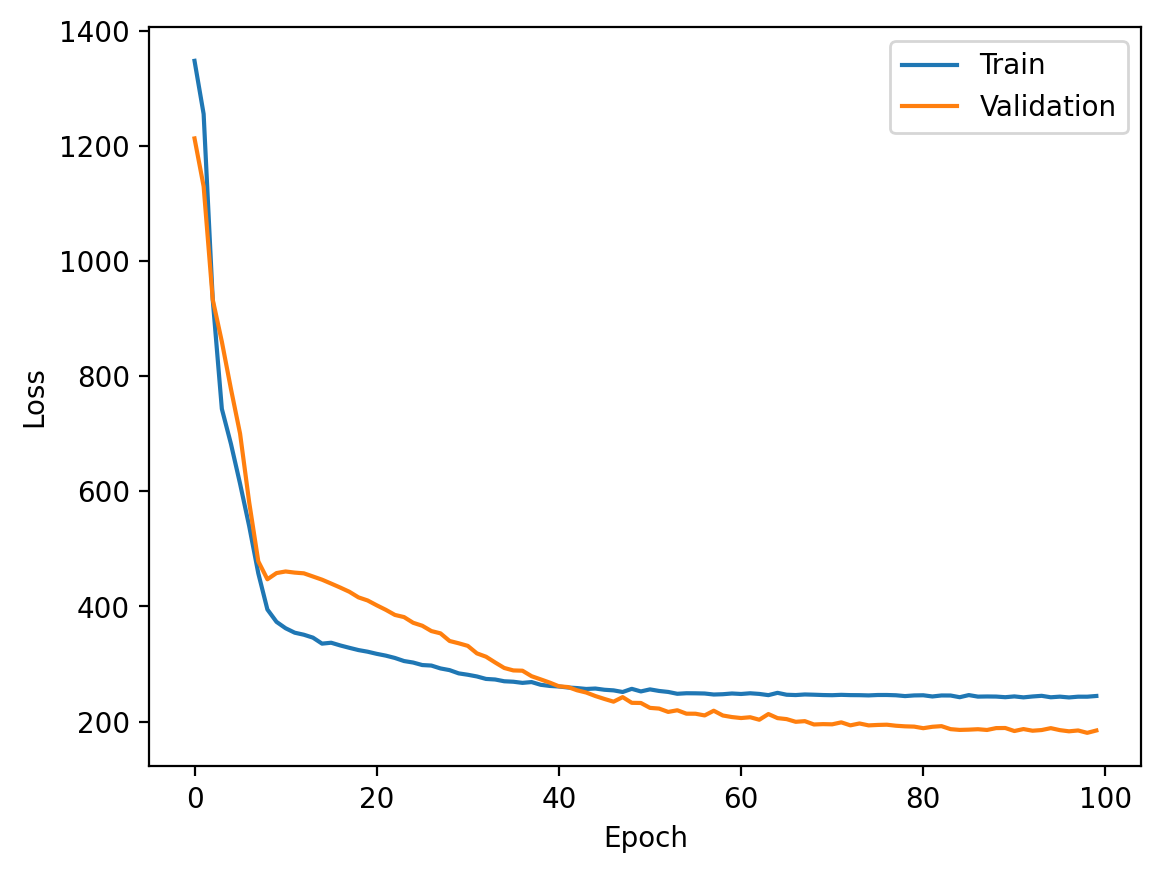

In [ ]:
plt.plot(train_losses, label="Train")
plt.plot(val_losses, label="Validation")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

In [ ]:
min(val_losses), val_losses[-1]

(180.44827591745477, 184.54286140308045)

In [ ]:
best_model = copy.deepcopy(model)
best_model.load_state_dict(best_model_state)

<All keys matched successfully>

In [ ]:
best_model.eval()
predictions = []
labels = []
with torch.inference_mode():
  for features, batch_labels in tqdm(test_loader):
    predictions.append(best_model(features.to(device)))
    labels.append(batch_labels)

100%|██████████| 91/91 [00:00<00:00, 236.28it/s]


In [ ]:
predictions[0]

tensor([[2359.5823],
        [2178.9399],
        [2179.3499],
        [2133.7607],
        [2340.8594],
        [2208.0784],
        [2413.4590],
        [2587.3965]], device='cuda:0')

In [ ]:
labels = torch.cat(labels).flatten().tolist()
predictions = torch.cat(predictions).flatten().tolist()
len(labels), len(predictions)

(728, 728)

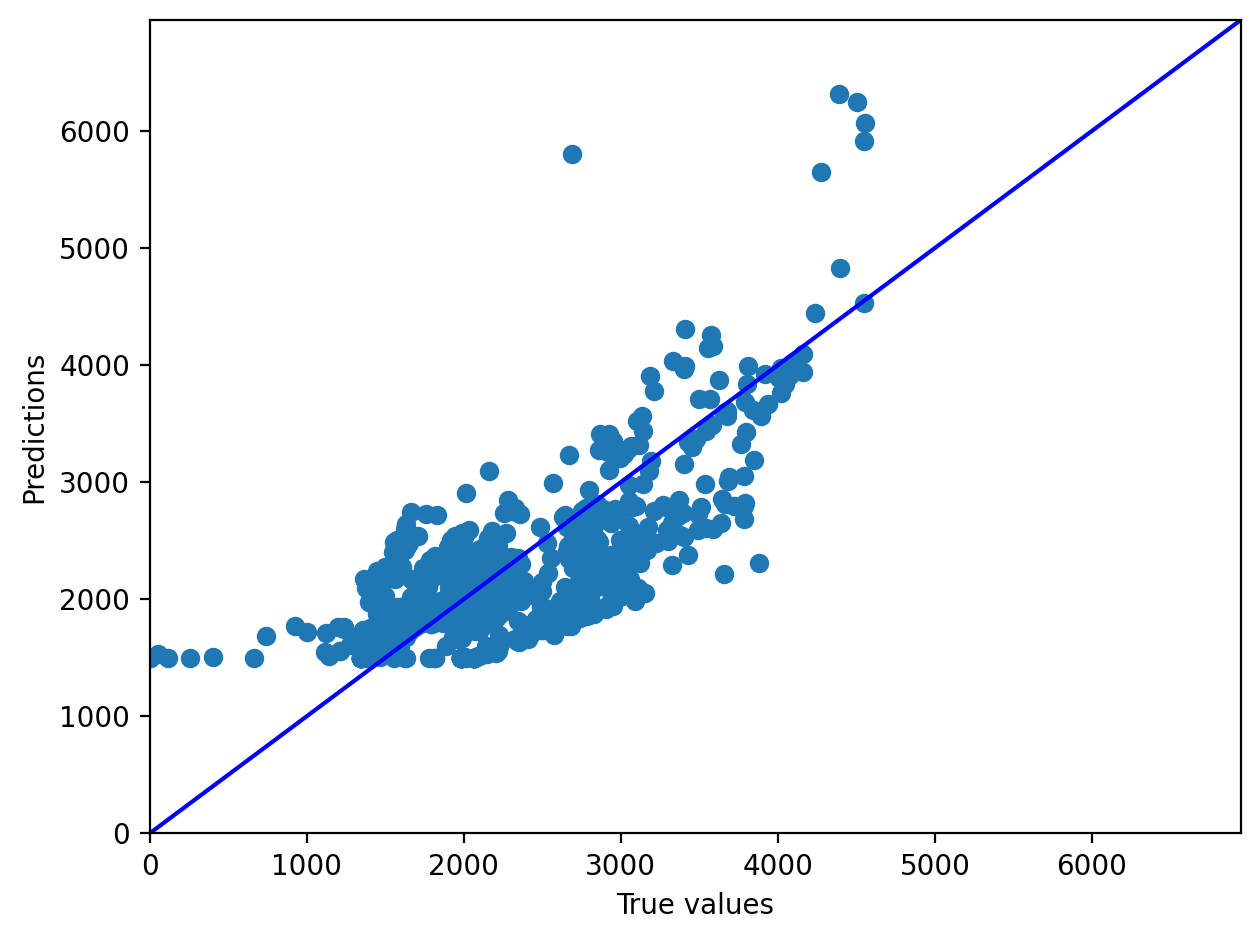

In [ ]:
plt.scatter(labels, predictions)

max_lim = max(max(predictions), max(labels))
max_lim += max_lim * 0.1

plt.xlim(0, max_lim)
plt.ylim(0, max_lim)

plt.plot([0, max_lim], [0, max_lim], "b-")

plt.xlabel("True values")
plt.ylabel("Predictions")
plt.tight_layout()